In [501]:
from sklearn.metrics import f1_score , precision_score , recall_score , accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# data = pd.read_csv('TrainDataV.NoNormalize3.csv', delimiter = ',').reset_index(drop=True)
data = pd.read_csv('normalizedtrainfinal.csv', delimiter = ',').reset_index(drop=True)
# train = pd.read_csv('train.csv', delimiter = ',').reset_index(drop=True)normalizedtrainfinal
# test = pd.read_csv('test.csv', delimiter = ',').reset_index(drop=True)

In [546]:
data_ans = pd.read_csv('normalizedtestfinal.csv', delimiter = ',').reset_index(drop=True)
data_ans = data_ans.sort_values(by=['Right_ip_id'])

In [547]:
x_ans = data_ans.drop(['Right_ip_id','ip_id'], axis=1).fillna(0)
x_ans.shape

(3938, 327)

In [548]:
####### no train test ###########
data1 = data.drop(['Targat'], axis=1).fillna(0)
# df.sort_values(by=['col1'])
# data1 = data[['SmartTile_Name','SmartTile_Name2','SmartTile_Name3','SmartTile_Name4','SmartTile_Name5','SmartTile_Name6','SmartTile_Name7',
# 'SmartTile_Name8','SmartTile_Name9','SmartTile_Name9_2','SmartTile_Name9_3','SmartTile_Name9_4','SmartTile_Name9_5','SmartTile_Name9_6',
# 'SmartTile_Name9_7','SmartTile_Name9_8','SmartTile_Name9_9','SmartTile_Name9_10','New_gnd_cd','New_mar_st_cd',
# 'New_ctf_tp_cd','New_ocp_cd','New_IsBangkok']]
# ['Targat','TotalSum_amt','ProvinceAmt','ChildPerBalance','SalaPerChild','BalanPerSala',
#                   'AccAgePerAge','AgeWhenOpenAcc','Age','YearAccStart','crn_bal','cis_income','no_of_dpnd_chl','brth_yr',
#                   'AccAge','TotalMedian_amt','TotalSumCC','TotalMedCC','TotalFQcc']

y = data[['Targat']].values
x = data1
x_train_, x_test_, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
###### x,y train test #########
# x_train_ = train.drop(['Target'], axis=1).fillna(0)
# y_train = train[['Target']].values

# x_test_ = test.drop(['Target'], axis=1).fillna(0)
# y_test = test[['Target']].values


####### for concat ########
x1 = pd.concat([x, x_ans])


print(x_train_.shape,y_train_.shape,x_test_.shape,y_test.shape)

(5088, 327) (5088, 1) (1273, 327) (1273, 1)


In [550]:
data_copy = data.copy()
# data_copy['test'] = 0
# data_copy[data_copy['TotalSum_amt'] >= 350000][['Targat']].values.sum()
x1.shape

(10299, 327)

In [551]:
############################################
####### for transform index category #######
############################################
import Encoder as en
import numpy as np

mcle = en.MultiColumnLabelEncoder(columns=np.array(['SmartTile_Name','SmartTile_Name2','SmartTile_Name3','SmartTile_Name4','SmartTile_Name5','SmartTile_Name6','SmartTile_Name7',
'SmartTile_Name8','SmartTile_Name9','SmartTile_Name9_2','SmartTile_Name9_3','SmartTile_Name9_4','SmartTile_Name9_5','SmartTile_Name9_6',
'SmartTile_Name9_7','SmartTile_Name9_8','SmartTile_Name9_9','SmartTile_Name9_10','New_gnd_cd','New_mar_st_cd',
'New_ctf_tp_cd','New_ocp_cd','New_IsBangkok','New_ProvinceAmt_Indicator','New_SAQ42017Ratio_Indicator','New_CCfreqGrowth_Indicator']))
mcle.fit(x1)
mcle.transform(x_test_)
mcle.transform(x_train_)
mcle.transform(x_ans)
mcle.transform(x)
x_train = x_train_.values
x_test = x_test_.values
x_ans = x_ans.values
x = x.values
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,x.shape)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001679A938400>>
Traceback (most recent call last):
  File "C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\xgboost\core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(5088, 327) (5088, 1) (1273, 327) (1273, 1) (6361, 327)


In [97]:
############################################
########## for encode one hot key ##########
############################################
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

x = data1.to_dict('records')
x_train = x_train_.to_dict('records')
x_test = x_test_.to_dict('records')

vec = DictVectorizer()
x = vec.fit_transform(x).toarray()
x_train = vec.transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()
print(x_train.shape,x_test.shape)

(5088, 424) (1273, 424)


In [247]:
print(x_train_)

      brth_yr  no_of_dpnd_chl  cis_income  crn_bal  YearAccStart  Age  AccAge  \
896      1976               0       42337      500          2007   42      11   
4803     1977               1       40767   213609          2014   41       4   
251      1978               0       23740  1537068          2015   40       3   
1209     1976               0       45066   707949          2010   42       8   
5955     1977               0       43107   428258          2009   41       9   
5026     1975               0       40713   252342          2013   43       5   
3206     1972               0       42333   738940          2008   46      10   
3337     1979               0       43985   616622          2007   39      11   
1128     1975               0       44307      500          2010   43       8   
4331     1977               0       45951      500          2010   41       8   
3098     1977               0       44963   341985          2010   41       8   
57       1997               

In [10]:
############################################
################ imbalance #################
############################################
from imblearn.over_sampling import SMOTE, ADASYN

# sm = SMOTE(random_state=42)
sm = ADASYN(random_state=42)
x_sm, y_sm = sm.fit_sample(x_train, y_train)


print(x_sm.shape,y_sm.shape)

C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(16093, 172) (16093,)


In [440]:
############################################
################### PCA ####################
############################################
from sklearn.decomposition import PCA
n_components = 25
pca = PCA(n_components=n_components, svd_solver='full',random_state=42)
pca.fit(x)
x = pca.transform(x)
x_sm = pca.transform(x_sm)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)


print(x.shape,y.shape)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(6361, 25) (6361, 1)
(5088, 25) (5088, 1) (1273, 25) (1273, 1)


In [552]:
############################################
############## not imbalance ###############
############################################
x_sm = x_train 
y_sm = y_train

In [553]:
############################################
########## optional for val data ###########
############################################
x_sm0 = x_sm[:4000]
x_val0 = x_sm[4000:]
y_sm0 = y_sm[:4000]
y_val0 = y_sm[4000:]
print(x_sm.shape,x_sm0.shape,y_sm0.shape,x_val0.shape,y_val0.shape)
print(y_sm.shape)

(5088, 327) (4000, 327) (4000, 1) (1088, 327) (1088, 1)
(5088, 1)


In [554]:
print(x_sm.shape,x_sm0.shape,y_sm0.shape,x_val0.shape,y_val0.shape,x_test.shape,x.shape)

(5088, 327) (4000, 327) (4000, 1) (1088, 327) (1088, 1) (1273, 327) (6361, 327)


In [555]:
############################################
############### Xgboost ####################
############################################
import xgboost as xgb
dsm = xgb.DMatrix(x_sm0, label=y_sm0)
dv0 = xgb.DMatrix(x_val0, label=y_val0)
dt = xgb.DMatrix(x_test, label=y_test)
dtrain = xgb.DMatrix(x_train, label=y_train)
evallist = [(dv0, 'eval'), (dsm, 'train')]
                  
# dsm = xgb.DMatrix(x_sm, label=y_sm)                  
# evallist = [(dt, 'eval'), (dsm, 'train')]
dx = xgb.DMatrix(x, label=y)
num_round = 10000
# binary:logistic
param = {'objective': 'binary:logistic',
 'colsample_bytree': 0.9683760122352089,
 'gamma':0.8835260600913024,
 'learning_rate': 0.2249426498504554,
 'max_depth': 20,
 'min_child_weight': 10.95324500379702,
 'n_estimators': 18,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'seed': 42,
 'eval_metric': 'auc',
 'lambda': 3,
 'alpha': 16,
 'rate_drop':0.950292864879127905,
 'tree_method':'exact',
 'normalize_type':'forest',
 'subsample': 0.9035691355661921}
 
evals_result = {}

# {'alpha': 17,
#  'colsample_bytree': 0.9866641258270036,
#  'gamma': 3.8835260600913024,
#  'lambda': 4,
#  'learning_rate': 0.23910223888617654,
#  'max_depth': 14,
#  'min_child_weight': 162.51127167841472,
#  'n_estimators': 18,
#  'objective': 'binary:logistic',
#  'rate_drop': 0.9502928648791279,
#  'scale_pos_weight': 1,
#  'seed': 42,
#  'subsample': 0.8944732072319205}

In [556]:
### train ####
bst = xgb.train(param, dx, num_round, evallist, evals_result=evals_result,early_stopping_rounds=10)

[19:49:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[0]	eval-auc:1	train-auc:1
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 10 rounds.
[19:49:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[1]	eval-auc:1	train-auc:1
[19:49:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[2]	eval-auc:1	train-auc:1
[19:49:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[3]	eval-auc:1	train-auc:1
[19:49:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1

In [538]:
#### evaluate ###
from sklearn.metrics import f1_score , precision_score , recall_score , accuracy_score , roc_curve , auc , classification_report
threshold = 0.3907732
treee = bst.best_ntree_limit
# treee = 27
y_pre = np.array(bst.predict(dt, ntree_limit=treee))
fpr, tpr, thresholds = roc_curve(y_test, y_pre, pos_label=1)
roc1_1  = auc(fpr, tpr)

y_pre_1 = np.array(bst.predict(dv0, ntree_limit=treee))
fpr, tpr, thresholds = roc_curve(y_val0, y_pre_1, pos_label=1)
roc1_11  = auc(fpr, tpr)

y_pre_2 = np.array(bst.predict(dtrain, ntree_limit=treee))
fpr, tpr, thresholds = roc_curve(y_train, y_pre_2, pos_label=1)
roc1_2  = auc(fpr, tpr)
print(roc1_1,roc1_11,roc1_2)
# print(classification_report(y_test, y_pre))

1.0 1.0 1.0


In [539]:
y_pre = np.array(bst.predict(dt, ntree_limit=treee))
y_pre  = y_pre > threshold
y_pre = y_pre.astype(int) 
f1_1  = f1_score(y_test, y_pre, average='binary')
f1_1

1.0

In [540]:
np.array(bst.predict(dt, ntree_limit=treee))

array([0.39025742, 0.39025742, 0.39025742, ..., 0.39025742, 0.39025742,
       0.39025742], dtype=float32)

In [486]:
a = bst.predict(dt, ntree_limit=treee)
np.argwhere(a>0.4)
np.argwhere(y_test>0.4)
1 = 1

SyntaxError: can't assign to literal (<ipython-input-486-2c457af9b464>, line 4)

In [ ]:
## best params ###

# param = {'objective': 'binary:logistic',
#  'colsample_bytree': 0.9683760122352089,
#  'gamma': 0.7790711924812199,
#  'learning_rate': 0.2249426498504554,
#  'max_depth': 20,
#  'min_child_weight': 10.95324500379702,
#  'n_estimators': 150,
#  'objective': 'binary:logistic',
#  'scale_pos_weight': 1,
#  'seed': 42,
#  'eval_metric': ['auc'],
#  'lambda': 2,
#  'alpha': 15,
# #  'rate_drop':0.5,
#  'tree_method':'exact',
#  'normalize_type':'forest',
#  'subsample': 0.9035691355661921}

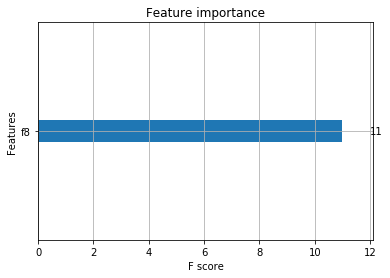

In [487]:
###### feature important ######
xgb.plot_importance(bst,max_num_features =20)

In [20]:
############################################
######## scikit-learn multi-models #########
############################################
import os
import numpy as np
import datetime

import scipy.stats as st

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from xgboost import XGBClassifier
from sklearn.externals import joblib
import catboost as cb
from lightgbm.sklearn import LGBMClassifier

n_jobs = -1
n_iter = 100
n_iter_nt = 3
n_components = 25
cv = 5
seed=42
n_features= x_sm.shape[1]
# n_features= n_components
is_pca = False
scoring = 'roc_auc'
# is_pca = True

In [21]:
########### models ################ param

# estimator = XGBClassifier(nthreads=-1,tree_method='exact')
param = {'objective': 'binary:logistic',
 'colsample_bytree': 0.9683760122352089,
 'gamma': 0.7790711924812199,
 'learning_rate': 0.2249426498504554,
 'max_depth': 20,
 'min_child_weight': 10.95324500379702,
 'n_estimators': 150,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'seed': 42,
 'eval_metric': ['auc'],
 'lambda': 2,
 'alpha': 15,
 'rate_drop':0.1,
 'tree_method':'exact',
 'normalize_type':'forest',
 'subsample': 0.9035691355661921}

estimator = XGBClassifier(**param)
objective = 'binary:logistic'

# Parameter for XGBoost
params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 30),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": st.beta(10, 1),
    "subsample": st.beta(10, 1),
    "gamma": st.uniform(0, 10),
    'objective': [objective],
    'scale_pos_weight': st.randint(0, 2),
    "min_child_weight": st.expon(0, 50),
    'lambda': st.randint(1, 20),
    'alpha': st.randint(0, 20),
    'rate_drop':st.uniform(0, 1),
    "seed": [seed],
}

xgb = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = scoring) 
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', xgb)]
    xgb = Pipeline(estimators)
    xgb = GridSearchCV(xgb, cv=5, n_jobs=-1, param_grid=param_grid)
    
#################################################################
#################################################################

estimator = LogisticRegression()
# Parameter for LogisticRegression
params = {
    "penalty": ['l1','l2'],
    "C": [0.001, 0.01, 0.1, 1, 10],
    "tol": [1e-4, 1e-3, 1e-2, 1e-1],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    "max_iter": st.randint(50, 100),
    'random_state': [seed],
} 
log = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter , scoring = scoring) 
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', log)]
    log = Pipeline(estimators)
    log = GridSearchCV(log, cv=5, n_jobs=-1, param_grid=param_grid)

#################################################################
#################################################################

estimator = KNeighborsClassifier()
# Parameter for KNeighborsClassifier
params = {
    "n_neighbors": st.randint(2, 50),
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute'],
    "leaf_size": st.randint(10, 30),
    "p": st.randint(1, 2),
}
knn = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter_nt , scoring = scoring)
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', knn)]
    knn = Pipeline(estimators)
    
#################################################################
#################################################################

estimator = RandomForestClassifier()

# Parameter for RandomForestClassifier
params = {
    "max_depth": [3, None],
    "max_features": st.randint(1, n_features),
    "min_samples_split": st.randint(2, 10),
    "min_samples_leaf": st.randint(1, n_features),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    'random_state': [seed],
}
rnf = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = scoring) 
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', rnf)]
    rnf = Pipeline(estimators)
    rnf = GridSearchCV(rnf, cv=5, n_jobs=-1, param_grid=param_grid)
    
#################################################################
#################################################################

estimator = ExtraTreesClassifier()
# 
# Parameter for ExtraTreesClassifier
params = {
    "n_estimators": st.randint(5, 50),
    "max_depth": [3, None],
    "max_features": st.randint(1, n_features),
    "min_samples_split": st.randint(2, 10),
    "min_samples_leaf": st.randint(1, n_features),
    "bootstrap": [True],
    "oob_score": [True],
    "criterion": ["gini", "entropy"],
    'random_state': [seed],
}
ext = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = scoring) 
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', ext)]
    ext = Pipeline(estimators)
    ext = GridSearchCV(ext, cv=5, n_jobs=-1, param_grid=param_grid)

#################################################################
#################################################################

estimator = AdaBoostClassifier()
# Parameter for AdaBoost
params = { 
    'n_estimators':st.randint(10, 100), 
    'learning_rate':st.beta(10, 1), 
    'algorithm':['SAMME', 'SAMME.R'],
    'random_state': [seed],
}
ada = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = scoring) 
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', ada)]
    ada = Pipeline(estimators)
    ada = GridSearchCV(ada, cv=5, n_jobs=-1, param_grid=param_grid)
    


#################################################################
#################################################################
estimator = SVC()
# Parameter for SVC
params = {  
    'C':[0.001, 0.01, 0.1, 1, 10], 
    'degree': st.randint(1, 10),
    'shrinking': [True, False],
    'probability': [True],
    'tol': [1e-3],
    'random_state': [seed],
}
svc = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter_nt, scoring = scoring)
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', svc)]
    svc = Pipeline(estimators)
#     svc = GridSearchCV(svc, cv=5, n_jobs=-1, param_grid=param_grid)

#################################################################
#################################################################

# Parameter for LGBMClassifier
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

estimator = LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [40,30],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [42,502], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

lgb = GridSearchCV(estimator, gridParams, verbose=0, cv=cv,n_jobs=n_jobs , scoring = scoring)
if(is_pca):
    print('asas')
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', lgb)]
    lgb = Pipeline(estimators)
    lgb = GridSearchCV(lgb, cv=5, n_jobs=-1, param_grid=param_grid)
# lgb = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter_nt)

#################################################################
#################################################################

estimator = cb.CatBoostClassifier()
params = {'depth': st.randint(3, 16),
          'learning_rate' : st.uniform(0.05, 0.4),
         'l2_leaf_reg': st.randint(0, 10),
         'iterations': [1]}

cat = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=2, scoring = scoring) 

In [26]:
###### test single model #######
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA ,NMF
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import f1_score , precision_score , recall_score , accuracy_score , roc_curve , auc

# nmf = NMF(n_components=5, init='random', random_state=42)

# C_OPTIONS = [1, 10, 100, 1000]
N_FEATURES_OPTIONS = [20, 25]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
#         'classify__C': C_OPTIONS
    }
]

pca = PCA(n_components=25, svd_solver='full',random_state=42)
estimators = [('reduce_dim',pca ), ('lgb', xgb)]
pipe = Pipeline(estimators)
pipe

grid = GridSearchCV(pipe, cv=5, n_jobs=-1, param_grid=param_grid)
grid

# model = cb.CatBoostClassifier(iterations=20, learning_rate=0.25, depth=10, loss_function='Logloss')
model = xgb
model.fit(x_sm, y_sm)
y_pre = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pre, pos_label=1)
f1_1  = auc(fpr, tpr)

y_pre_2 = model.predict_prob(x_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_pre_2, pos_label=1)
f1_2  = auc(fpr, tpr)
print(f1_1,f1_2)

C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5 0.5


C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [28]:
y_pre = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pre, pos_label=1)
f1_1  = auc(fpr, tpr)

y_pre_2 = model.predict_proba(x_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_pre_2, pos_label=1)
f1_2  = auc(fpr, tpr)
print(f1_1,f1_2)

0.6392806740121063 0.6480578168082083


In [29]:
model.best_params_

{'alpha': 17,
 'colsample_bytree': 0.9866641258270036,
 'gamma': 3.8835260600913024,
 'lambda': 4,
 'learning_rate': 0.23910223888617654,
 'max_depth': 14,
 'min_child_weight': 162.51127167841472,
 'n_estimators': 18,
 'objective': 'binary:logistic',
 'rate_drop': 0.9502928648791279,
 'scale_pos_weight': 1,
 'seed': 42,
 'subsample': 0.8944732072319205}

In [29]:
########## train #########
is_xgb = 1
is_log = 1
is_knn = 1
is_rnf = 1
is_ext = 1
is_ada = 1
is_lgb = 1
is_svc = 1
is_cat = 1

# is_xgb = 0
# is_log = 0
# is_knn = 0
# is_rnf = 0
# is_ext = 0
# is_ada = 0
# is_lgb = 0
# is_svc = 0
is_cat = 0

if(is_xgb == 1):
    xgb.fit(x_sm,y_sm)
if(is_log == 1):
    log.fit(x_sm,y_sm)
if(is_knn == 1):
    knn.fit(x_sm,y_sm)
if(is_rnf == 1):
    rnf.fit(x_sm,y_sm)
if(is_ext == 1):
    ext.fit(x_sm,y_sm)
if(is_ada == 1):
    ada.fit(x_sm,y_sm)
if(is_lgb == 1):
    lgb.fit(x_sm,y_sm)
if(is_svc == 1):
    svc.fit(x_sm,y_sm)
if(is_cat == 1):
    cat.fit(x_sm,y_sm)

########## save #########

# joblib.dump(xgb, 'xgb.pkl') 
# joblib.dump(log, 'log.pkl') 
# joblib.dump(knn, 'knn.pkl') 
# joblib.dump(rnf, 'rnf.pkl') 
# joblib.dump(ext, 'ext.pkl') 
# joblib.dump(ada, 'ada.pkl') 
# joblib.dump(lgb, 'svc.pkl') 
# joblib.dump(svc, 'svc.pkl') 
# joblib.dump(cat, 'svc.pkl') 

# vote2 = joblib.load('vote.pkl') 

In [32]:
is_xgb = 0
is_log = 0
is_knn = 0
is_rnf = 0
is_ext = 0
is_ada = 1
is_lgb = 1
is_svc = 1
############ load ##############
# xgb = joblib.load('xgb.pkl')
# log = joblib.load('log.pkl') 
# knn = joblib.load('knn.pkl') 
# rnf = joblib.load('rnf.pkl') 
# ext = joblib.load('ext.pkl') 
# ada = joblib.load('ada.pkl') 
# lgb = joblib.load('lgb.pkl') 
# svc = joblib.load('svc.pkl') 

In [36]:
########## params #############
if(is_xgb == 1):
    best_params1 = xgb.best_params_
if(is_log == 1):
    best_params2 = log.best_params_
if(is_knn == 1):
    best_params3 = knn.best_params_
if(is_rnf == 1):
    best_params4 = rnf.best_params_
if(is_ext == 1):
    best_params5 = ext.best_params_
if(is_ada == 1):
    best_params6 = ada.best_params_
if(is_lgb == 1):
    best_params7 = lgb.best_params_
if(is_svc == 1):
    best_params8 = svc.best_params_
if(is_cat == 1):
    best_params9 = cat.best_params_

In [25]:
print(x_val.shape,y_val.shape)

(2144, 172) (2144, 1)


In [35]:
########### evaluate ###########
from sklearn.metrics import f1_score , precision_score , recall_score , accuracy_score , roc_curve , auc
x_val = x_test
y_val = y_test
def auc_score(model,x_val,y_val,x_train,y_train,name = 'model'):
    y_pre = model.predict_proba(x_val)[:,1]
    y_pre_2 = model.predict_proba(x_train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pre, pos_label=1)
    f1  = auc(fpr, tpr)
    fpr, tpr, thresholds = roc_curve(y_train, y_pre_2, pos_label=1)
    f1_2  = auc(fpr, tpr)
    print(f1,f1_2,name)

if(is_xgb == 1):
    auc_score(xgb,x_val,y_val,x_train,y_train,'xgb')

if(is_log == 1):
    auc_score(log,x_val,y_val,x_train,y_train,'log')
    
if(is_knn == 1):
    auc_score(knn,x_val,y_val,x_train,y_train,'knn')
    
if(is_rnf == 1):
    auc_score(rnf,x_val,y_val,x_train,y_train,'rnf')
    
if(is_ext == 1):
    auc_score(ext,x_val,y_val,x_train,y_train,'ext')
    
if(is_ada == 1):
    auc_score(ada,x_val,y_val,x_train,y_train,'ada')
    
if(is_lgb == 1):    
    auc_score(lgb,x_val,y_val,x_train,y_train,'lgb')
    
if(is_svc == 1):
    auc_score(svc,x_val,y_val,x_train,y_train,'svc')
    
if(is_cat == 1):
    auc_score(cat,x_val,y_val,x_train,y_train,'cat')
    

0.5451523498605727 0.6047783607815765 ada
0.5088544854791539 0.6103574983270541 lgb
0.5518814187580766 0.7022144035413752 svc


In [ ]:
################ for vote #############
vote_list = []
if(is_xgb == 1):
    xgb = XGBClassifier(**best_params1)
    vote_list.append(('xgb', xgb))
if(is_log == 1):
    log = LogisticRegression(**best_params2)
    vote_list.append(('log', log))
if(is_knn == 1):
    knn = KNeighborsClassifier(**best_params3)
    vote_list.append(('knn', knn))
if(is_rnf == 1):
    rnf = RandomForestClassifier(**best_params4)
    vote_list.append(('ext', ext))
if(is_ext == 1):
    ext = ExtraTreesClassifier(**best_params5)
    vote_list.append(('ext', ext))
if(is_ada == 1):
    ada = AdaBoostClassifier(**best_params6)
    vote_list.append(('ada', ada))
if(is_lgb == 1):
    lgb = LGBMClassifier(**best_params7)
    vote_list.append(('lgb', lgb))
if(is_svc == 1):
    svc = SVC(**best_params8)
    vote_list.append(('svc', svc))
if(is_cat == 1):
    cat = cb.CatBoostClassifier(**best_params9)
    vote_list.append(('cat', cat))
    
vote = VotingClassifier(estimators=vote_list, voting='soft')
vote.fit(x_sm, y_sm)
auc_score(vote,x_val,y_val,x_train,y_train,'vote')

In [ ]:
############## feature something ##############
a = log.best_estimator_.coef_
a = ada.best_estimator_.feature_importances_
# print(np.argwhere(a>0.01),np.argwhere(a<-0.01))
# print(np.argwhere(a!=0))
b = np.argwhere(a!=0)
# np.reshape(b,(b.shape[]))
b = b.ravel()
print(b,np.array([9,10,11,136,148,154,156,158,159]))
print(np.argwhere(a>0.01),np.argwhere(a<-0.01))
x_sm2 = x_sm[:,np.array(b)]
x_sm2.shape

In [ ]:
############# stack ##################
xx = x_sm
xx_val = x_val
xx_train = x_train
no_feature = 0

def stack_data(model,x_data,result,no_fea = 0):
    if(no_fea == 1):
        result = model.predict_proba(x_data)[:,1]
    else:
        re1 = model.predict_proba(x_data)[:,1]
        re_1 = re1[:,0]
        re_1 = np.reshape(re_1, (re_1.shape[0],1))
        result = np.concatenate((result, re_1), axis=1)
    return result

if(is_xgb == 1):
    xx = stack_data(xgb,x_sm,xx)
    xx_val = stack_data(xgb,x_val,xx_val)
    xx_train = stack_data(xgb,x_train,xx_train)

if(is_log == 1):
    xx = stack_data(log,x_sm,xx)
    xx_val = stack_data(log,x_val,xx_val)
    xx_train = stack_data(log,x_train,xx_train)
    
if(is_knn == 1):
    xx = stack_data(knn,x_sm,xx)
    xx_val = stack_data(knn,x_val,xx_val)
    xx_train = stack_data(knn,x_train,xx_train)

if(is_rnf == 1):
    xx = stack_data(rnf,x_sm,xx)
    xx_val = stack_data(rnf,x_val,xx_val)
    xx_train = stack_data(rnf,x_train,xx_train)
    
if(is_ext == 1):
    xx = stack_data(ext,x_sm,xx)
    xx_val = stack_data(ext,x_val,xx_val)
    xx_train = stack_data(ext,x_train,xx_train)
    
if(is_ada == 1):
    xx = stack_data(ada,x_sm,xx)
    xx_val = stack_data(ada,x_val,xx_val)
    xx_train = stack_data(ada,x_train,xx_train)
    
if(is_lgb == 1):
    xx = stack_data(lgb,x_sm,xx)
    xx_val = stack_data(lgb,x_val,xx_val)
    xx_train = stack_data(lgb,xx_train,xx_train)
    
if(is_svc == 1):
    xx = stack_data(svc,x_sm,xx)
    xx_val = stack_data(svc,x_val,xx_val)
    xx_train = stack_data(svc,x_train,xx_train)
    
if(is_cat == 1):
    xx = stack_data(cat,x_sm,xx)
    xx_val = stack_data(cat,x_val,xx_val)
    xx_train = stack_data(cat,x_train,xx_train)
    
#     re1 = cat.predict_proba(x_sm)
#     re_1 = re1[:,0]
#     re_1 = np.reshape(re_1, (re_1.shape[0],1))
#     xx = np.concatenate((xx, re_1), axis=1)
    

In [ ]:
########### for second stack models ###########
n_jobs = -1
n_iter = 50
cv = 5
seed=42
# n_features=xx.shape[1]
n_features= xx.shape[1]

estimator = XGBClassifier(nthreads=-1)
objective = 'binary:logistic'

# Parameter for XGBoost
params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 30),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": st.beta(10, 1),
    "subsample": st.beta(10, 1),
    "gamma": st.uniform(0, 10),
    'objective': [objective],
    'scale_pos_weight': st.randint(0, 2),
    "min_child_weight": st.expon(0, 50),
    "seed": [seed],
}
xgb2 = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = scoring) 

estimator = LogisticRegression()
# Parameter for LogisticRegression
params = {
    "penalty": ['l1','l2'],
    "C": [0.001, 0.01, 0.1, 1, 10],
    "tol": [1e-4, 1e-3, 1e-2, 1e-1],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    "max_iter": st.randint(50, 100),
    'random_state': [seed],
} 
log2 = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = scoring) 

estimator = RandomForestClassifier()
# Parameter for RandomForestClassifier
params = {
    "max_depth": [3, None],
    "max_features": st.randint(1, n_features),
    "min_samples_split": st.randint(2, 10),
    "min_samples_leaf": st.randint(1, n_features),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    'random_state': [seed],
}
rnf2 = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = scoring) 

estimator = ExtraTreesClassifier()
# Parameter for ExtraTreesClassifier
params = {
    "n_estimators": st.randint(5, 50),
    "max_depth": [3, None],
    "max_features": st.randint(1, n_features),
    "min_samples_split": st.randint(2, 10),
    "min_samples_leaf": st.randint(1, n_features),
    "bootstrap": [True],
    "oob_score": [True],
    "criterion": ["gini", "entropy"],
    'random_state': [seed],
}
ext2 = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = 'AUC') 

estimator = AdaBoostClassifier()
# Parameter for AdaBoost
params = { 
    'n_estimators':st.randint(10, 100), 
    'learning_rate':st.beta(10, 1), 
    'algorithm':['SAMME', 'SAMME.R'],
    'random_state': [seed],
}
ada2 = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = scoring)

params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [42,502], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

estimator = LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

lgb2 = GridSearchCV(estimator, gridParams, verbose=0, cv=cv,n_jobs=n_jobs, scoring = scoring)

In [ ]:
############################################
############### Xgboost2 ###################
############################################
import xgboost as xgb
dsm2 = xgb.DMatrix(xx, label=y_sm)
# dv0 = xgb.DMatrix(x_val0, label=y_val0)
dt2 = xgb.DMatrix(xx_test, label=y_test)
dtrain = xgb.DMatrix(xx_train, label=y_train)
evallist = [(dv0, 'eval'), (dsm2, 'train')]
                  
dsm = xgb.DMatrix(xx, label=y_sm)                  
evallist = [(dt2, 'eval'), (dsm2, 'train')]
                  
num_round = 10000
# binary:logistic
param = {'objective': 'binary:logistic',
 'colsample_bytree': 0.9683760122352089,
 'gamma': 0.7790711924812199,
 'learning_rate': 0.2249426498504554,
 'max_depth': 20,
 'min_child_weight': 10.95324500379702,
 'n_estimators': 150,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'seed': 42,
 'eval_metric': ['auc'],
 'lambda': 2,
 'alpha': 15,
#  'rate_drop':0.5,
 'tree_method':'exact',
 'normalize_type':'forest',
 'subsample': 0.9035691355661921}
 
evals_result = {}

In [ ]:
### train ####
bst2 = xgb.train(param, dsm2, num_round, evallist, evals_result=evals_result,early_stopping_rounds=100)

In [ ]:
#### evaluate ###
from sklearn.metrics import f1_score , precision_score , recall_score , accuracy_score , roc_curve , auc
treee = bst.best_ntree_limit
# treee = 139
y_pre = np.array(bst2.predict(dt2, ntree_limit=treee))
fpr, tpr, thresholds = roc_curve(y_test, y_pre, pos_label=1)
roc1_1  = auc(fpr, tpr)

y_pre_1 = np.array(bst2.predict(dv0, ntree_limit=treee))
fpr, tpr, thresholds = roc_curve(y_val0, y_pre_1, pos_label=1)
roc1_11  = auc(fpr, tpr)

y_pre_2 = np.array(bst2.predict(dtrain2, ntree_limit=treee))
fpr, tpr, thresholds = roc_curve(y_train, y_pre_2, pos_label=1)
roc1_2  = auc(fpr, tpr)
print(roc1_1,roc1_11,roc1_2)
# print(classification_report(y_test, y_pre))

In [ ]:
########## train scikit #####################
xgb2.fit(xx,y_sm)
log2.fit(xx,y_sm)
rnf2.fit(xx,y_sm)
ext2.fit(xx,y_sm)
ada2.fit(xx,y_sm)
lgb2.fit(xx,y_sm)

In [ ]:
from sklearn.metrics import f1_score , precision_score , recall_score , accuracy_score , roc_curve , auc

def auc_score(model,x_val,y_val,x_train,y_train,name = 'model'):
    y_pre = model.predict_proba(x_val)[:,1]
    y_pre_2 = model.predict_proba(x_train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pre, , pos_label=1)
    f1  = auc(fpr, tpr)
    fpr, tpr, thresholds = roc_curve(y_train, y_pre_2, , pos_label=1)
    f1_2  = auc(fpr, tpr)
    print(f1,f1_2,name)

auc_score(xgb2,xx_val,y_val,xx_train,y_train,'xgb2')
auc_score(log2,xx_val,y_val,xx_train,y_train,'log2')
auc_score(rnf2,xx_val,y_val,xx_train,y_train,'rnf2')
auc_score(ext2,xx_val,y_val,xx_train,y_train,'ext2')
auc_score(ada2,xx_val,y_val,xx_train,y_train,'ada2')
auc_score(lgb2,xx_val,y_val,xx_train,y_train,'lgb2')

In [ ]:
########## vote 2 #############

best_params21 = xgb2.best_params_
best_params22 = log2.best_params_
best_params23 = rnf2.best_params_
best_params24 = ext2.best_params_
best_params25 = ada2.best_params_
best_params26 = lgb2.best_params_

xgb2 = XGBClassifier(**best_params21)
log2 = LogisticRegression(**best_params22)
rnf2 = RandomForestClassifier(**best_params23)
ext2 = ExtraTreesClassifier(**best_params24)
ada2 = AdaBoostClassifier(**best_params25)
lgb2 = LGBMClassifier(**best_params26)

    
vote_list = [('xgb2', xgb2), ('log2', log2), ('rnf2', rnf2), ('ext2', ext2), ('ada2', ada2), ('lgb2', lgb2)]
vote2 = VotingClassifier(estimators=vote_list, voting='soft')
vote2.fit(xx, y_sm)
auc_score(vote2,xx_val,y_val,xx_train,y_train)

In [557]:
dans = xgb.DMatrix(x_ans)

In [566]:
sv = np.array(bst.predict(dans, ntree_limit=treee))
np.savetxt("ans_01.csv", sv, delimiter=",")

In [565]:
a = bst.predict(dans, ntree_limit=treee)
np.argwhere(a>0.5).shape

(858, 1)

In [541]:
x_ans

array([[0.35      , 0.17234848, 0.26666667, ..., 0.        , 0.        ,
        0.        ],
       [0.15      , 0.05539773, 0.41333333, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.29333333, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.525     , 0.19840116, 0.4       , ..., 1.        , 0.        ,
        1.        ],
       [0.05      , 0.01450893, 0.57333333, ..., 1.        , 1.        ,
        1.        ],
       [0.075     , 0.04513889, 0.18666667, ..., 1.        , 0.        ,
        1.        ]])